<a href="https://colab.research.google.com/github/MasaHLabo/PyCode/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第１３章　畳み込みニューラルネットワーク


13.1　TensolFlowとKerasを使えるようにする

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

13.2　多層パーセプトロンの実装

keras.utils.to_categoricalまでライブラリを深く参照してくれないため（よくある！）

※５行目を追加すること

In [ ]:
import keras # (1) モジュールのインポート
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.utils import to_categorical #変更追加した分 keras.utils.to_categoricalまで参照してくれないため
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # (2) データの読み込み

x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') # データ変換
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32')
x_train /= 255 # 正規化(0.0~1.0の範囲に変換)
x_test /= 255
y_train = to_categorical(y_train, 10)#13行を変更追加した分
#y_train = keras.utils.to_categorical(y_train, 10) # ラベルをone-hotに変換
#y_test = keras.utils.to_categorical(y_test, 10) # fashion_mnistは10クラス
y_test = to_categorical(y_test, 10)#14行を変更追加した分
model = Sequential() # (3)モデルを構築する
model.add(Dense(128, input_shape=(28*28, ), activation='relu'))
model.add(Dense(10, activation='softmax')) # 出力層

model.summary() # モデルの表示

model.compile(loss='categorical_crossentropy', # (4) モデルのコンパイル、損失関数
              optimizer='adam', # 更新方法
              metrics=['accuracy']) # 正答率

hist = model.fit(x_train, y_train, # (5) 学習
                 batch_size=128, epochs=20, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1) # (6) モデルの評価
print('test loss:', score[0]) # 結果の表示
print('test acc:', score[1])



以前のkeras.utils.to_categoricalまで参照してくれない場合の回避方法　5行目

In [ ]:
import keras # (1) モジュールのインポート
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras import utils as np_utils #変更追加した分　以前はこの形が多い、np_utilsの内容が変わったと書かれたサイトもあるので？？
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # (2) データの読み込み

x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') # データ変換
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32')
x_train /= 255 # 正規化(0.0~1.0の範囲に変換)
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)#13行を変更追加した分
#y_train = keras.utils.to_categorical(y_train, 10) # ラベルをone-hotに変換
#y_test = keras.utils.to_categorical(y_test, 10) # fashion_mnistは10クラス
y_test = np_utils.to_categorical(y_test, 10)#14行を変更追加した分
model = Sequential() # (3)モデルを構築する
model.add(Dense(128, input_shape=(28*28, ), activation='relu'))
model.add(Dense(10, activation='softmax')) # 出力層

model.summary() # モデルの表示

model.compile(loss='categorical_crossentropy', # (4) モデルのコンパイル、損失関数
              optimizer='adam', # 更新方法
              metrics=['accuracy']) # 正答率

hist = model.fit(x_train, y_train, # (5) 学習
                 batch_size=128, epochs=20, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1) # (6) モデルの評価
print('test loss:', score[0]) # 結果の表示
print('test acc:', score[1])

from sklearn import metrics
p = model.predict(x_test)
print(metrics.confusion_matrix(y_test.argmax(axis=1), p.argmax(axis=1)))



13.2.6　層の追加

In [ ]:
import keras # (1) モジュールのインポート
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras import utils as np_utils #変更追加した分　以前はこの形が多い、np_utilsの内容が変わったと書かれたサイトもあるので？？
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # (2) データの読み込み

x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') # データ変換
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32')
x_train /= 255 # 正規化(0.0~1.0の範囲に変換)
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)#13行を変更追加した分
#y_train = keras.utils.to_categorical(y_train, 10) # ラベルをone-hotに変換
#y_test = keras.utils.to_categorical(y_test, 10) # fashion_mnistは10クラス
y_test = np_utils.to_categorical(y_test, 10)#14行を変更追加した分
model = Sequential() # (3)モデルを構築する
model.add(Dense(128, input_shape=(28*28, ), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # 出力層

model.summary() # モデルの表示

model.compile(loss='categorical_crossentropy', # (4) モデルのコンパイル、損失関数
              optimizer='adam', # 更新方法
              metrics=['accuracy']) # 正答率

hist = model.fit(x_train, y_train, # (5) 学習
                 batch_size=128, epochs=20, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1) # (6) モデルの評価
print('test loss:', score[0]) # 結果の表示
print('test acc:', score[1])

model.save(path+'model_weightsNN.h5')

from sklearn import metrics
p = model.predict(x_test)
print(metrics.confusion_matrix(y_test.argmax(axis=1), p.argmax(axis=1)))



13.2.7 運用

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path='/content/drive/MyDrive/'

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

file = input('画像ファイル名: ')
file=path+file
img = cv2.imread(file) # 画像ファイルの読み込み
img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA) #データのリサイズ
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
img = np.array(img, 'float') # NumPyの配列にする
img = (255 - img) / 255  # 反転し、0~1へ
img = img.reshape(1, 28*28) # 1次元配列に変換

model = load_model(path+'model_weightsNN.h5') # モデルとパラメータの読み込み

fashion={ 0:'Tシャツ', 1:'ズボン', 2:'プルオーバー', 3:'ドレス', 4:'コート', 5:'サンダル',
          6:'シャツ', 7:'スニーカー', 8:'バッグ', 9:'アンクルブーツ' }
ret = model.predict([img]) # 分類
print(ret)
c = np.argmax(ret)
print(fashion[c]+'です')

13.2.8

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5338 - accuracy: 0.8148 - val_loss: 0.4394 - val_accuracy: 0.8477
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3792 - accuracy: 0.8640 - val_loss: 0.3905 - val_accuracy: 0.8627
Epoch 3/20
469/469 [========

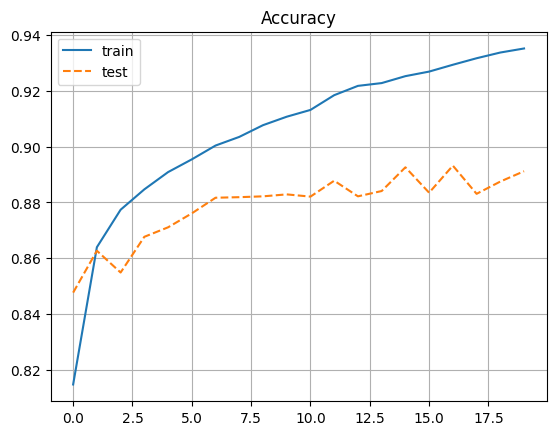

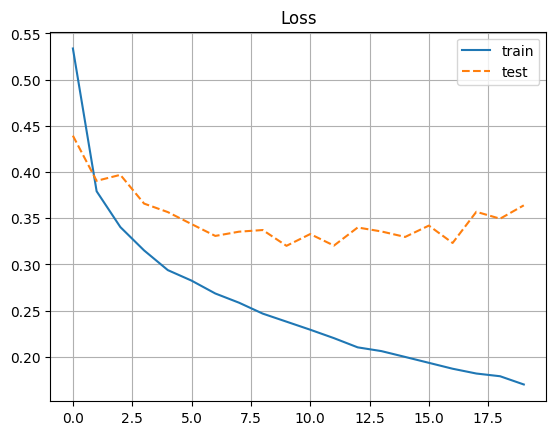

In [12]:
import keras # (1) モジュールのインポート
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras import utils as np_utils #変更追加した分　以前はこの形が多い、np_utilsの内容が変わったと書かれたサイトもあるので？？
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # (2) データの読み込み

x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') # データ変換
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32')
x_train /= 255 # 正規化(0.0~1.0の範囲に変換)
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)#13行を変更追加した分
#y_train = keras.utils.to_categorical(y_train, 10) # ラベルをone-hotに変換
#y_test = keras.utils.to_categorical(y_test, 10) # fashion_mnistは10クラス
y_test = np_utils.to_categorical(y_test, 10)#14行を変更追加した分
model = Sequential() # (3)モデルを構築する
model.add(Dense(128, input_shape=(28*28, ), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # 出力層

model.summary() # モデルの表示

model.compile(loss='categorical_crossentropy', # (4) モデルのコンパイル、損失関数
              optimizer='adam', # 更新方法
              metrics=['accuracy']) # 正答率

hist = model.fit(x_train, y_train, # (5) 学習
                 batch_size=128, epochs=20, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1) # (6) モデルの評価
print('test loss:', score[0]) # 結果の表示
print('test acc:', score[1])

model.save(path+'model_weightsNN.h5')

from sklearn import metrics
p = model.predict(x_test)
print(metrics.confusion_matrix(y_test.argmax(axis=1), p.argmax(axis=1)))

import matplotlib.pyplot as plt # 学習の様子をグラフ化
plt.plot(hist.history['accuracy']) # 訓練データでの正解率
plt.plot(hist.history['val_accuracy'], linestyle='--') # テストデータでの正解率
plt.title('Accuracy')
plt.legend(['train', 'test'])
plt.grid(True)
plt.figure()

plt.plot(hist.history['loss']) # 損失率
plt.plot(hist.history['val_loss'], linestyle='--')
plt.title('Loss')
plt.legend(['train', 'test'])
plt.grid(True)
plt.show()

In [ ]:
import keras # (1) モジュールのインポート
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras import utils as np_utils #変更追加した分　以前はこの形が多い、np_utilsの内容が変わったと書かれたサイトもあるので？？
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # (2) データの読み込み

x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') # データ変換
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32')
x_train /= 255 # 正規化(0.0~1.0の範囲に変換)
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)#13行を変更追加した分
#y_train = keras.utils.to_categorical(y_train, 10) # ラベルをone-hotに変換
#y_test = keras.utils.to_categorical(y_test, 10) # fashion_mnistは10クラス
y_test = np_utils.to_categorical(y_test, 10)#14行を変更追加した分
model = Sequential() # (3)モデルを構築する
model.add(Dense(128, input_shape=(28*28, ), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # 出力層

model.summary() # モデルの表示

model.compile(loss='categorical_crossentropy', # (4) モデルのコンパイル、損失関数
              optimizer='adam', # 更新方法
              metrics=['accuracy']) # 正答率

hist = model.fit(x_train, y_train, # (5) 学習
                 batch_size=128, epochs=20, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1) # (6) モデルの評価
print('test loss:', score[0]) # 結果の表示
print('test acc:', score[1])

#model.save(path+'model_weightsNN.h5')

from sklearn import metrics
p = model.predict(x_test)
print(metrics.confusion_matrix(y_test.argmax(axis=1), p.argmax(axis=1)))

import matplotlib.pyplot as plt # 学習の様子をグラフ化

fig =plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1.plot(hist.history['accuracy']) # 訓練データでの正解率
ax1.plot(hist.history['val_accuracy'], linestyle='--') # テストデータでの正解率
ax1.set_title('Accuracy')
ax1.legend(['train', 'test'])
ax1.grid(True)
plt.figure()

ax2=fig.add_subplot(1,2,2)
ax2.plot(hist.history['loss']) # 損失率
ax2.plot(hist.history['val_loss'], linestyle='--')
ax2.set_title('Loss')
ax2.legend(['train', 'test'])
ax2.grid(True)
plt.show()

ドロップアウト

In [ ]:
import keras # (1) モジュールのインポート
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras import utils as np_utils #変更追加した分　以前はこの形が多い、np_utilsの内容が変わったと書かれたサイトもあるので？？
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # (2) データの読み込み

x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') # データ変換
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32')
x_train /= 255 # 正規化(0.0~1.0の範囲に変換)
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)#13行を変更追加した分
#y_train = keras.utils.to_categorical(y_train, 10) # ラベルをone-hotに変換
#y_test = keras.utils.to_categorical(y_test, 10) # fashion_mnistは10クラス
y_test = np_utils.to_categorical(y_test, 10)#14行を変更追加した分
model = Sequential() # (3)モデルを構築する
model.add(Dense(128, input_shape=(28*28, ), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax')) # 出力層

model.summary() # モデルの表示

model.compile(loss='categorical_crossentropy', # (4) モデルのコンパイル、損失関数
              optimizer='adam', # 更新方法
              metrics=['accuracy']) # 正答率

hist = model.fit(x_train, y_train, # (5) 学習
                 batch_size=128, epochs=20, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1) # (6) モデルの評価
print('test loss:', score[0]) # 結果の表示
print('test acc:', score[1])

#model.save(path+'model_weightsNN.h5')

from sklearn import metrics
p = model.predict(x_test)
print(metrics.confusion_matrix(y_test.argmax(axis=1), p.argmax(axis=1)))

import matplotlib.pyplot as plt # 学習の様子をグラフ化

fig =plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1.plot(hist.history['accuracy']) # 訓練データでの正解率
ax1.plot(hist.history['val_accuracy'], linestyle='--') # テストデータでの正解率
ax1.set_title('Accuracy')
ax1.legend(['train', 'test'])
ax1.grid(True)
plt.figure()

ax2=fig.add_subplot(1,2,2)
ax2.plot(hist.history['loss']) # 損失率
ax2.plot(hist.history['val_loss'], linestyle='--')
ax2.set_title('Loss')
ax2.legend(['train', 'test'])
ax2.grid(True)
plt.show()

13.3

13.3.3

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Flatten  # for CNN
from keras.layers.convolutional import Conv2D # for CNN
from keras.layers.pooling import MaxPooling2D # for CNN

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # データの読み込み

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10) # one-hotへ変換
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential() # モデルの作成
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # 畳み込み層
model.add(MaxPooling2D(pool_size=(2, 2))) # プーリング層
model.add(Flatten()) # 全結合層に渡すための1次元化
model.add(Dense(128, activation='relu')) # 全結合層
model.add(Dense(10, activation='softmax')) # 出力層

model.summary() # モデルの表示

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('test loss:', score[0])
print('test acc:', score[1])

model.save(path+'model_weightsCNN.h5')

13.3.4

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout  # for CNN
from keras.layers.convolutional import Conv2D # for CNN
from keras.layers.pooling import MaxPooling2D # for CNN

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # データの読み込み

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10) # one-hotへ変換
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential() # モデルの作成
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # 畳み込み層
model.add(MaxPooling2D(pool_size=(2, 2))) # プーリング層
model.add(Dropout(0.25))
model.add(Flatten()) # 全結合層に渡すための1次元化
model.add(Dense(128, activation='relu')) # 全結合層
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 出力層

model.summary() # モデルの表示

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('test loss:', score[0])
print('test acc:', score[1])

model.save(path+'model_weightsCNN.h5')

13.3.5

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

file = input('画像ファイル名: ')
file=path+file
img = cv2.imread(file) # 画像データの読み込み
img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA) #データのリサイズ
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
img = np.array(img, 'float') # NumPyの配列にする
img = (255 - img) / 255 # 反転し、0~1へ変換
img = img.reshape(1, 28, 28, 1) # 28x28の配列に変換

model = load_model(path+'model_weightsCNN.h5') # 学習済みの重みの読み込み

fashion={ 0:'Tシャツ', 1:'ズボン', 2:'プルオーバー', 3:'ドレス', 4:'コート', 5:'サンダル',
          6:'シャツ', 7:'スニーカー', 8:'バッグ', 9:'アンクルブーツ' }
ret = model.predict([img]) # 分類
c=np.argmax(ret)
print(fashion[c]+'です')

13.3.6

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout  # for CNN
from keras.layers.convolutional import Conv2D # for CNN
from keras.layers.pooling import MaxPooling2D # for CNN

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # データの読み込み

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10) # one-hotへ変換
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential() # モデルの作成
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # 畳み込み層
model.add(Conv2D(64, kernel_size=(3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # プーリング層
model.add(Dropout(0.25))
model.add(Flatten()) # 全結合層に渡すための1次元化
model.add(Dense(128, activation='relu')) # 全結合層
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 出力層

model.summary() # モデルの表示

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('test loss:', score[0])
print('test acc:', score[1])

model.save(path+'model_weightsCNN.h5')

VGGライクなNN 動作未

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout # for CNN
from keras.layers.convolutional import Conv2D # for CNN
from keras.layers.pooling import MaxPooling2D # for CNN

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10) # one-hotへ変換
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential()
# 入力: サイズが100x100で3チャンネルをもつ画像 -> (100, 100, 3) のテンソル
# それぞれのlayerで3x3の畳み込み処理を適用している
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

from keras.callbacks import ModelCheckpoint
hist = model.fit(x_train, y_train, batch_size=128, epochs=60, verbose=1,
#                 callbacks=[ EarlyStopping(monitor='val_loss', patience=10),
                 callbacks=[ModelCheckpoint('weightsCNN.h5', monitor='val_loss', save_best_only=True)],
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('test loss:', score[0])
print('test acc:', score[1])

json_string = model.to_json()
f = open(path+'modelCNN.json', 'w')
f.write(json_string)


13.3.7

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout # for CNN
from keras.layers.convolutional import Conv2D # for CNN
from keras.layers.pooling import MaxPooling2D # for CNN

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10) # one-hotへ変換
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential() # モデルの作成
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # 畳み込み層
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 畳み込み層
model.add(MaxPooling2D(pool_size=(2, 2))) # プーリング層
model.add(Dropout(0.25)) # ドロップアウト層
model.add(Flatten()) # 全結合層に渡すための1次元化
model.add(Dense(128, activation='relu')) # 全結合層
model.add(Dropout(0.5)) # ドロップアウト層
model.add(Dense(10, activation='softmax')) # 出力層

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ModelCheckpoint
hist = model.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1,
                 callbacks=[ EarlyStopping(monitor='val_loss', patience=10),
                            ModelCheckpoint('model_weightsCNN.h5', monitor='val_loss', save_best_only=True)],
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('test loss:', score[0])
print('test acc:', score[1])

13.4

In [8]:
from keras.datasets import fashion_mnist
import os
import cv2

def save(kind, data, label):
    for n in range(0, data.shape[0]): # 画像の枚数分処理する
        l = label[n] # ラベルの取り出し
        #if l != 7 and l != 8 and l != 9: # 7,8,9以外は読み飛ばす
        if l != 7:
            continue
        file = os.path.join('data', kind, str(l), str(n) + '.png') # ファイル名作成
        img = data[n].reshape(28, 28) # OpenCVの画像形式へ
        img = cv2.resize(img, (28*2, 28*2)) # 小さいので拡大する
        cv2.imwrite(file, img) # 画像ファイルとして保存

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # データの読み込み
train=path+'train'
test=path+'test'
save('train', x_train, y_train)
save('test', x_test, y_test)

keras version  2.8.0
train_images shape = (60000, 28, 28)


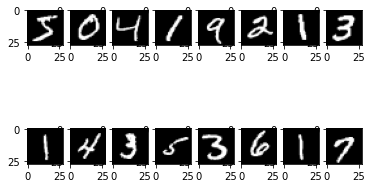

train_labels shape = (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# TensorFlowとKerasのインポート
import tensorflow as tf
import keras
#from tensorflow.keras import utils as np_utils #変更追加した分
from tensorflow.keras.utils import to_categorical
# 手書き数字MNISTデータセットのインポート
from keras.datasets import mnist
from matplotlib import pyplot
# kerasのバージョン確認
print('keras version ',keras.__version__)

# 手書き数字MNISTデータを読み込み
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 画像データの次元確認
print('train_images shape =', train_images.shape)

# 画像データ16件をキャンバスに2行8列で白黒で出力
for i in range(0, 16):
    pyplot.subplot(2, 8, i + 1)
    pyplot.imshow(train_images[i], cmap='gray')
pyplot.show()
# ラベルデータをone-hotベクトルに変換
# https://keras.io/ja/utils/#to_categorical

#train_labels = keras.utils.to_categorical(train_labels.astype('int32'), 10)
#test_labels = keras.utils.to_categorical(test_labels.astype('int32'), 10)
train_labels = to_categorical(train_labels.astype('int32'), 10)
test_labels = to_categorical(test_labels.astype('int32'), 10)
# ラベルデータの要素確認
print('train_labels shape =', train_labels.shape)

# ラベルデータ３件だけ表示
for i in range(0, 3):
  print(train_labels[i])

keras version  2.8.0
train_images shape = (60000, 28, 28)


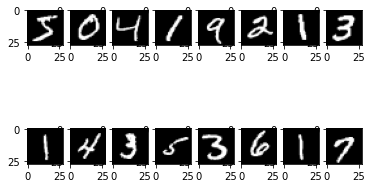

train_labels shape = (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# TensorFlowとKerasのインポート
import tensorflow as tf
#import keras
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

from tensorflow.keras import utils as np_utils #変更追加した分
# 手書き数字MNISTデータセットのインポート
from keras.datasets import mnist
from matplotlib import pyplot
# kerasのバージョン確認
print('keras version ',keras.__version__)

# 手書き数字MNISTデータを読み込み
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 画像データの次元確認
print('train_images shape =', train_images.shape)

# 画像データ16件をキャンバスに2行8列で白黒で出力
for i in range(0, 16):
    pyplot.subplot(2, 8, i + 1)
    pyplot.imshow(train_images[i], cmap='gray')
pyplot.show()
# ラベルデータをone-hotベクトルに変換
# https://keras.io/ja/utils/#to_categorical

#train_labels = keras.utils.to_categorical(train_labels.astype('int32'), 10)
#test_labels = keras.utils.to_categorical(test_labels.astype('int32'), 10)
#train_labels = np_utils.to_categorical(train_labels.astype('int32'), 10)
#test_labels = np_utils.to_categorical(test_labels.astype('int32'), 10)
train_labels = to_categorical(train_labels.astype('int32'), 10)
test_labels = to_categorical(test_labels.astype('int32'), 10)
# ラベルデータの要素確認
print('train_labels shape =', train_labels.shape)

# ラベルデータ３件だけ表示
for i in range(0, 3):
  print(train_labels[i])

In [ ]:
# shapeが(60000, 28, 28)を(60000, 28, 28, 1)に次元を増やす。
# KerasでCNN演算行う場合、デフォルトがchannels_lastになっていることに注意。
# 因みにRGBカラー画像だと、(60000, 28, 28, 3)となる。
# train_images.shape[0] = 60000
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
# 次元の確認
print(train_images.shape)
# 整数型の画像データをfloat型に変換
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# 学習のために0～255の整数値を0～1.0の範囲に収めるために、全要素を255で割る
train_images = train_images / 255.0
test_images = test_images / 255.0

(60000, 28, 28, 1)


In [ ]:
# MNIST CNNモデル構築
from keras.models import Sequential # Sequentialモデルとはモデルを積み重ねたもの
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Activation
import numpy as np # NumPyモジュールをインポート

# MNIST画像データをchannels_firstにする為に次元を入れ換え
train_images = np.transpose(train_images, [0, 3, 1, 2])
test_images = np.transpose(test_images, [0, 3, 1, 2])

# CNNモデルを構築
model_cnn = Sequential()
#layer0
output_channels = 5
model_cnn.add(Conv2D(output_channels,
                     kernel_size=(4, 4),
                     strides=(1, 1),
                     padding='valid',
                     data_format='channels_first',
                     input_shape=(1, 28, 28),
                     dilation_rate=(1, 1),
                     activation=None,
                     use_bias=True,
                     kernel_initializer='glorot_normal',
                     bias_initializer='ones',
                     kernel_regularizer=None,
                     bias_regularizer=None,
                     activity_regularizer=None,
                     kernel_constraint=None,
                     bias_constraint=None,
                     name='conv1'))
#layer1
model_cnn.add(MaxPooling2D(pool_size=(2, 2),
                           strides=(2, 2),
                           padding='same',
                           data_format='channels_first',
                           name='maxpool1'))
#layer2
model_cnn.add(Activation('tanh'))
#layer3
output_channels = 3
model_cnn.add(Conv2D(output_channels,
                     kernel_size=(3, 3),
                     strides=(1, 1),
                     padding='valid',
                     data_format='channels_first',
                     dilation_rate=(1, 1),
                     activation=None,
                     use_bias=True,
                     kernel_initializer='glorot_normal',
                     bias_initializer='ones',
                     kernel_regularizer=None,
                     bias_regularizer=None,
                     activity_regularizer=None,
                     kernel_constraint=None,
                     bias_constraint=None,
                     name='conv2'))

#layer4
model_cnn.add(MaxPooling2D(pool_size=(2, 2),
                           strides=(2, 2),
                           padding='same',
                           data_format='channels_first',
                           name='maxpool2'))
#layer5
model_cnn.add(Activation('tanh'))
#layer6
output_channels = 3
model_cnn.add(Conv2D(output_channels,
                     kernel_size=(4, 4),
                     strides=(1, 1),
                     padding='valid',
                     data_format='channels_first',
                     dilation_rate=(1, 1),
                     activation=None,
                     use_bias=True,
                     kernel_initializer='glorot_normal',
                     bias_initializer='ones',
                     kernel_regularizer=None,
                     bias_regularizer=None,
                     activity_regularizer=None,
                     kernel_constraint=None,
                     bias_constraint=None,
                     name='conv3'))
#layer7
model_cnn.add(Activation('tanh'))
#layer8
model_cnn.add(Flatten(data_format=None, name='flat1'))
#layer9
output_channels = 10
model_cnn.add(Dense(output_channels,
                    activation=None,
                    use_bias=True,
                    kernel_initializer='glorot_normal',
                    bias_initializer='ones',
                    kernel_regularizer=None,
                    bias_regularizer=None,
                    activity_regularizer=None,
                    kernel_constraint=None,
                    bias_constraint=None,
                    name='dense1'))
#layer10
model_cnn.add(Activation('softmax'))

In [ ]:
import matplotlib.pyplot as plt

# モデルをコンパイル
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

# 学習を実行する
hist = model_cnn.fit(train_images, train_labels,
          batch_size=64,
          epochs=2000,
          verbose=1,
          validation_data=(test_images, test_labels))

model_cnn.summary()

# モデルを評価する
score = model_cnn.evaluate(test_images, test_labels, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフ表示
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロス値をグラフ表示
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 学習済みモデルをh5形式ファイルでGoogleドライブに保存
#model_cnn.save('/content/drive/MyDrive/colab_my_data/my_model.h5')
